ANÁLISE DE DELIVERY DE REFEIÇÕES

📂 CARREGANDO DADOS...
✅ Pasta 'dados' criada.

⚠️ Os seguintes arquivos são necessários e não foram encontrados na pasta 'dados': pedidos.csv, cardapio.csv
Por favor, faça o upload dos arquivos 'pedidos.csv' e 'cardapio.csv' quando solicitado.


Saving cardapio.csv to cardapio.csv
Saving pedidos.csv to pedidos.csv
✅ Arquivo 'cardapio.csv' movido para 'dados/'.
✅ Arquivo 'pedidos.csv' movido para 'dados/'.
✅ Dados carregados com sucesso!
   - Pedidos: 450 registros
   - Cardápio: 20 itens

📊 ANÁLISE EXPLORATÓRIA DE DADOS

--- ESTRUTURA DO DATASET DE PEDIDOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       450 non-null    int64  
 1   Data            450 non-null    object 
 2   Cliente_ID      450 non-null    int64  
 3   Item            450 non-null    object 
 4   Quantidade      431 non-null    float64
 5   Preco_Unitario  430 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 21.2+ KB
None

--- PRIMEIRAS LINHAS ---
   ID_Pedido        Data  Cliente_ID            Item  Quantidade  \
0          1  2023-11-16         222  Torta de Limao 

/tmp/ipython-input-2913970198.py:114: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pedidos['Quantidade'].fillna(media_quantidade, inplace=True)


✅ Gráfico salvo: top5_quantidade.png
✅ Gráfico salvo: receita_categoria.png
✅ Gráfico salvo: evolucao_receita.png

📋 RESUMO DA ANÁLISE

🎯 PRINCIPAIS INSIGHTS:

1. VENDAS:
   - Item mais vendido: Hamburguer (511 unidades)
   - Item mais lucrativo: Pizza Calabresa (R$ 15903.65)

2. FINANCEIRO:
   - Receita Total: R$ 122,652.59
   - Ticket Médio: R$ 285.24
   - Categoria mais lucrativa: Salgados (R$ 53073.30)

3. TEMPORAL:
   - Mês com maior receita: 2023-02
   - Receita nesse mês: R$ 6646.03

4. QUALIDADE DOS DADOS:
   - Total de pedidos analisados: 430
   - Itens no cardápio: 20
   - Dados tratados e limpos com sucesso ✅

✅ ANÁLISE CONCLUÍDA COM SUCESSO!


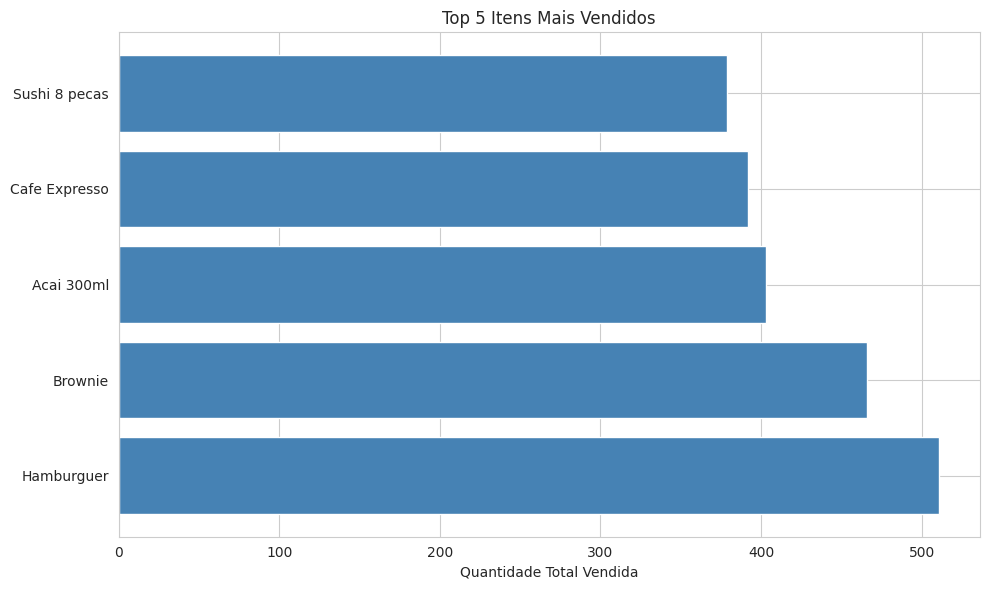

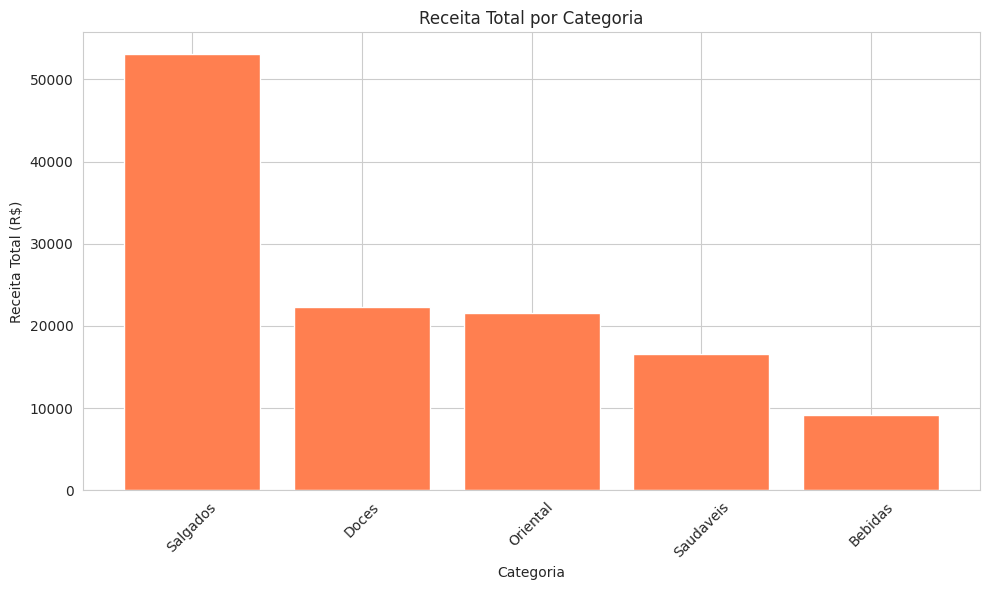

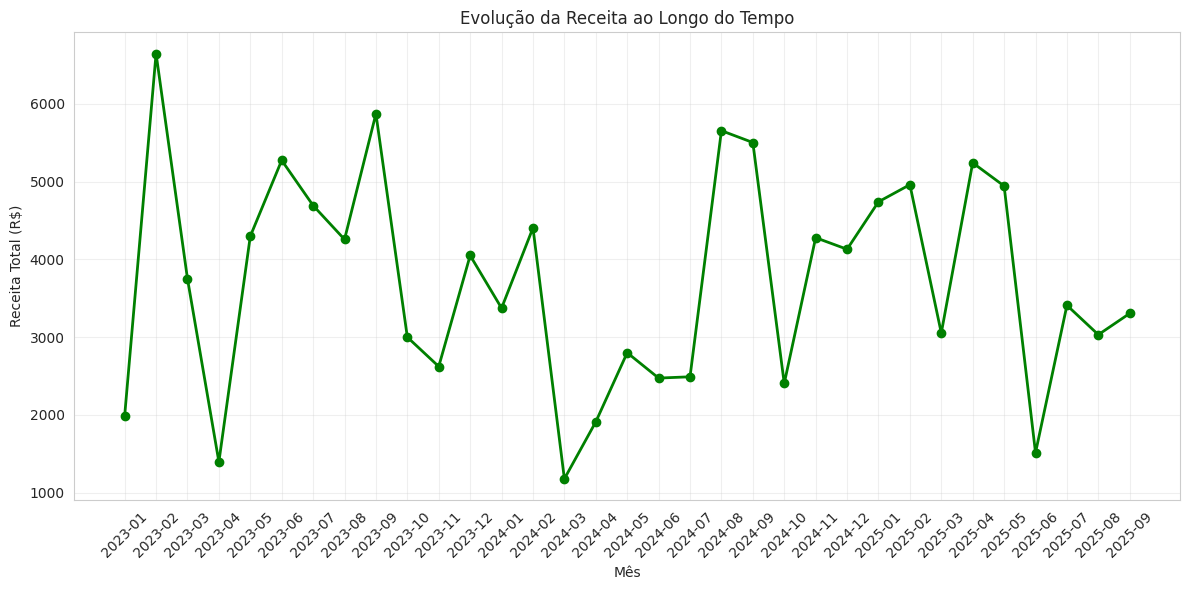

In [2]:
# ============================================================================
# PROJETO: ANÁLISE DE DELIVERY DE REFEIÇÕES
# Descrição: Análise completa de dados de pedidos usando Pandas e NumPy
# ============================================================================

# 1. IMPORTAÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os # Adicionado para manipulação de diretórios

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("ANÁLISE DE DELIVERY DE REFEIÇÕES")
print("=" * 80)

# ============================================================================
# 2. CARREGAMENTO DOS DADOS
# ============================================================================
print("\n📂 CARREGANDO DADOS...")

# --- MODIFICAÇÃO PARA TRATAR FileNotFoundError ---
# Verifica se a pasta 'dados' existe, caso contrário, cria
if not os.path.exists('dados'):
    os.makedirs('dados')
    print("✅ Pasta 'dados' criada.")

# Verifica se os arquivos já existem para evitar sobrescrever se já foram carregados
# e para permitir o upload interativo se não estiverem presentes.
required_files = ['pedidos.csv', 'cardapio.csv']
missing_files = [f for f in required_files if not os.path.exists(os.path.join('dados', f))]

if missing_files:
    print(f"\n⚠️ Os seguintes arquivos são necessários e não foram encontrados na pasta 'dados': {', '.join(missing_files)}")
    print("Por favor, faça o upload dos arquivos 'pedidos.csv' e 'cardapio.csv' quando solicitado.")

    # Importa a função de upload do Colab
    from google.colab import files
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Move o arquivo carregado para a pasta 'dados'
        os.rename(filename, os.path.join('dados', filename))
        print(f"✅ Arquivo '{filename}' movido para 'dados/'.")
else:
    print("\n✅ Arquivos de dados 'pedidos.csv' e 'cardapio.csv' já encontrados na pasta 'dados'.")
# ---------------------------------------------------

# Carregando os datasets
pedidos = pd.read_csv('dados/pedidos.csv')
cardapio = pd.read_csv('dados/cardapio.csv')

print("✅ Dados carregados com sucesso!")
print(f"   - Pedidos: {pedidos.shape[0]} registros")
print(f"   - Cardápio: {cardapio.shape[0]} itens")

# ============================================================================
# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# ============================================================================
print("\n" + "=" * 80)
print("📊 ANÁLISE EXPLORATÓRIA DE DADOS")
print("=" * 80)

print("\n--- ESTRUTURA DO DATASET DE PEDIDOS ---")
print(pedidos.info())

print("\n--- PRIMEIRAS LINHAS ---")
print(pedidos.head())

print("\n--- ÚLTIMAS LINHAS ---")
print(pedidos.tail())

print("\n--- ESTATÍSTICAS DESCRITIVAS ---")
print(pedidos.describe())

print("\n--- ESTRUTURA DO CARDÁPIO ---")
print(cardapio.info())
print(cardapio.head())

# ============================================================================
# 4. FEATURE ENGINEERING
# ============================================================================
print("\n" + "=" * 80)
print("🔧 CRIAÇÃO DE NOVAS COLUNAS")
print("=" * 80)

# Criar coluna Receita_Item
pedidos['Receita_Item'] = pedidos['Quantidade'] * pedidos['Preco_Unitario']

print("✅ Coluna 'Receita_Item' criada com sucesso!")
print(f"\nPrimeiras linhas com nova coluna:")
print(pedidos[['Item', 'Quantidade', 'Preco_Unitario', 'Receita_Item']].head())

# ============================================================================
# 5. TRATAMENTO DE VALORES AUSENTES
# ============================================================================
print("\n" + "=" * 80)
print("🧹 TRATAMENTO DE VALORES AUSENTES")
print("=" * 80)

# Identificar valores nulos
print("\n--- VALORES NULOS POR COLUNA ---")
valores_nulos = pedidos.isnull().sum()
print(valores_nulos[valores_nulos > 0])

# Preencher valores ausentes na coluna Quantidade com a média
if pedidos['Quantidade'].isnull().sum() > 0:
    media_quantidade = pedidos['Quantidade'].mean()
    pedidos['Quantidade'].fillna(media_quantidade, inplace=True)
    print(f"\n✅ Valores nulos em 'Quantidade' preenchidos com a média: {media_quantidade:.2f}")

# Remover linhas com valores nulos em Preco_Unitario
registros_antes = len(pedidos)
pedidos.dropna(subset=['Preco_Unitario'], inplace=True)
registros_depois = len(pedidos)
print(f"✅ Removidas {registros_antes - registros_depois} linhas com 'Preco_Unitario' nulo")

# Recalcular Receita_Item após tratamento
pedidos['Receita_Item'] = pedidos['Quantidade'] * pedidos['Preco_Unitario']

print(f"\n📊 Total de registros após limpeza: {len(pedidos)}")

# ============================================================================
# 6. AGREGAÇÕES POR ITEM
# ============================================================================
print("\n" + "=" * 80)
print("📈 AGREGAÇÕES POR ITEM")
print("=" * 80)

# Agrupar por Item
agregacao_item = pedidos.groupby('Item').agg({
    'Quantidade': 'sum',
    'Receita_Item': 'sum'
}).reset_index()

agregacao_item.columns = ['Item', 'Quantidade_Total', 'Receita_Total']

# Top 5 itens mais vendidos por quantidade
print("\n--- TOP 5 ITENS MAIS VENDIDOS (QUANTIDADE) ---")
top5_quantidade = agregacao_item.nlargest(5, 'Quantidade_Total')
print(top5_quantidade)

# Top 5 itens que geraram mais receita
print("\n--- TOP 5 ITENS QUE GERARAM MAIS RECEITA ---")
top5_receita = agregacao_item.nlargest(5, 'Receita_Total')
print(top5_receita)

# ============================================================================
# 7. ANÁLISE TEMPORAL
# ============================================================================
print("\n" + "=" * 80)
print("📅 ANÁLISE TEMPORAL")
print("=" * 80)

# Converter coluna Data para datetime
pedidos['Data'] = pd.to_datetime(pedidos['Data'])
print("✅ Coluna 'Data' convertida para datetime")

# Extrair o mês
pedidos['Mes'] = pedidos['Data'].dt.to_period('M')

# Calcular receita total por mês
receita_mensal = pedidos.groupby('Mes')['Receita_Item'].sum().reset_index()
receita_mensal.columns = ['Mes', 'Receita_Total']

print("\n--- RECEITA TOTAL POR MÊS ---")
print(receita_mensal)

# Identificar mês com maior receita
mes_maior_receita = receita_mensal.loc[receita_mensal['Receita_Total'].idxmax()]
print(f"\n🏆 Mês com maior receita: {mes_maior_receita['Mes']} - R$ {mes_maior_receita['Receita_Total']:.2f}")

# ============================================================================
# 8. INTEGRAÇÃO DE DADOS (MERGE)
# ============================================================================
print("\n" + "=" * 80)
print("🔗 INTEGRAÇÃO COM CARDÁPIO")
print("=" * 80)

# Fazer merge entre pedidos e cardápio
pedidos_completo = pd.merge(
    pedidos,
    cardapio,
    on='Item',
    how='left'
)

print("✅ Merge realizado com sucesso!")
print(f"\nColunas após merge: {list(pedidos_completo.columns)}")

# Calcular receita total por categoria
receita_categoria = pedidos_completo.groupby('Categoria')['Receita_Item'].sum().reset_index()
receita_categoria.columns = ['Categoria', 'Receita_Total']
receita_categoria = receita_categoria.sort_values('Receita_Total', ascending=False)

print("\n--- RECEITA TOTAL POR CATEGORIA ---")
print(receita_categoria)

categoria_top = receita_categoria.iloc[0]
print(f"\n🏆 Categoria que gera mais receita: {categoria_top['Categoria']} - R$ {categoria_top['Receita_Total']:.2f}")

# ============================================================================
# 9. FILTROS E CONSULTAS
# ============================================================================
print("\n" + "=" * 80)
print("🔍 FILTROS ESPECÍFICOS")
print("=" * 80)

# Filtrar pedidos da categoria 'Salgados' com quantidade > 10
filtro_salgados = pedidos_completo[
    (pedidos_completo['Categoria'] == 'Salgados') &
    (pedidos_completo['Quantidade'] > 10)
]

print(f"\n--- SALGADOS COM QUANTIDADE > 10 ---")
print(f"Total de pedidos encontrados: {len(filtro_salgados)}")
print(filtro_salgados[['Item', 'Quantidade', 'Receita_Item', 'Categoria']].head(10))

# ============================================================================
# 10. KPIs E ANÁLISE ESTATÍSTICA COM NUMPY
# ============================================================================
print("\n" + "=" * 80)
print("📊 KPIs E INDICADORES ESTATÍSTICOS")
print("=" * 80)

# Receita Total
receita_total = pedidos['Receita_Item'].sum()
print(f"\n💰 Receita Total: R$ {receita_total:,.2f}")

# Total de Itens Vendidos
total_itens_vendidos = pedidos['Quantidade'].sum()
print(f"📦 Total de Itens Vendidos: {total_itens_vendidos:,.0f} unidades")

# Ticket Médio
numero_pedidos = len(pedidos)
ticket_medio = receita_total / numero_pedidos
print(f"🎫 Ticket Médio: R$ {ticket_medio:,.2f}")

# DESAFIO EXTRA: Percentis com NumPy
print("\n--- PERCENTIS (25%, 50%, 75%) ---")

# Percentis de Preco_Unitario
percentis_preco = np.percentile(pedidos['Preco_Unitario'].dropna(), [25, 50, 75])
print(f"\n📊 Preço Unitário:")
print(f"   - 25% dos preços estão abaixo de: R$ {percentis_preco[0]:.2f}")
print(f"   - 50% dos preços estão abaixo de (mediana): R$ {percentis_preco[1]:.2f}")
print(f"   - 75% dos preços estão abaixo de: R$ {percentis_preco[2]:.2f}")

# Percentis de Quantidade
percentis_qtd = np.percentile(pedidos['Quantidade'].dropna(), [25, 50, 75])
print(f"\n📊 Quantidade:")
print(f"   - 25% das quantidades estão abaixo de: {percentis_qtd[0]:.2f}")
print(f"   - 50% das quantidades estão abaixo de (mediana): {percentis_qtd[1]:.2f}")
print(f"   - 75% das quantidades estão abaixo de: {percentis_qtd[2]:.2f}")

# ============================================================================
# 11. VISUALIZAÇÕES
# ============================================================================
print("\n" + "=" * 80)
print("📈 GERANDO VISUALIZAÇÕES")
print("=" * 80)

# Gráfico 1: Top 5 Itens Mais Vendidos
plt.figure(figsize=(10, 6))
plt.barh(top5_quantidade['Item'], top5_quantidade['Quantidade_Total'], color='steelblue')
plt.xlabel('Quantidade Total Vendida')
plt.title('Top 5 Itens Mais Vendidos')
plt.tight_layout()
plt.savefig('top5_quantidade.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo: top5_quantidade.png")

# Gráfico 2: Receita por Categoria
plt.figure(figsize=(10, 6))
plt.bar(receita_categoria['Categoria'], receita_categoria['Receita_Total'], color='coral')
plt.xlabel('Categoria')
plt.ylabel('Receita Total (R$)')
plt.title('Receita Total por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('receita_categoria.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo: receita_categoria.png")

# Gráfico 3: Evolução Temporal da Receita
plt.figure(figsize=(12, 6))
receita_mensal['Mes'] = receita_mensal['Mes'].astype(str)
plt.plot(receita_mensal['Mes'], receita_mensal['Receita_Total'], marker='o', linewidth=2, color='green')
plt.xlabel('Mês')
plt.ylabel('Receita Total (R$)')
plt.title('Evolução da Receita ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('evolucao_receita.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico salvo: evolucao_receita.png")

# ============================================================================
# 12. RESUMO FINAL
# ============================================================================
print("\n" + "=" * 80)
print("📋 RESUMO DA ANÁLISE")
print("=" * 80)

print(f"""
🎯 PRINCIPAIS INSIGHTS:

1. VENDAS:
   - Item mais vendido: {top5_quantidade.iloc[0]['Item']} ({top5_quantidade.iloc[0]['Quantidade_Total']:.0f} unidades)
   - Item mais lucrativo: {top5_receita.iloc[0]['Item']} (R$ {top5_receita.iloc[0]['Receita_Total']:.2f})

2. FINANCEIRO:
   - Receita Total: R$ {receita_total:,.2f}
   - Ticket Médio: R$ {ticket_medio:.2f}
   - Categoria mais lucrativa: {categoria_top['Categoria']} (R$ {categoria_top['Receita_Total']:.2f})

3. TEMPORAL:
   - Mês com maior receita: {mes_maior_receita['Mes']}
   - Receita nesse mês: R$ {mes_maior_receita['Receita_Total']:.2f}

4. QUALIDADE DOS DADOS:
   - Total de pedidos analisados: {len(pedidos)}
   - Itens no cardápio: {len(cardapio)}
   - Dados tratados e limpos com sucesso ✅
""")

print("=" * 80)
print("✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
print("=" * 80)
